<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/ANN/Seq_vs_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

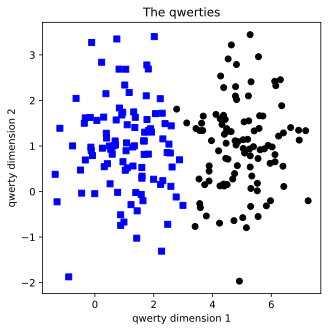

In [5]:
# create data
n_per_clust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]

# generate labels
labels_np = np.vstack((np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1))))

# concatanate into matrix
data_np = np.hstack((a,b)).T

# convert data into a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# plot data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.title('The qwerties')
plt.show()

In [19]:
## define the class                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
class ANNClass(nn.Module):
  def __init__(self):
    super(ANNClass, self).__init__()
    self.input = nn.Linear(2,1)
    self.output = nn.Linear(1,1)

  def forward(self, x):
    x = self.input(x)
    x = F.relu(x)
    x = self.output(x)
    x = torch.sigmoid(x)
    return x

ANN_classify = ANNClass()

In [20]:
learning_rate = .01
loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(ANN_classify.parameters(), lr= learning_rate)

In [21]:
data[:5]

tensor([[-0.0051, -0.0473],
        [ 1.8286,  1.3401],
        [ 0.5784,  0.9738],
        [ 1.7668,  2.7790],
        [ 1.6346, -0.2012]])

In [26]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANN_classify(data)

  # compute loss
  loss = loss_fun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [27]:
# compute the predictions
predictions = ANN_classify(data)
predlabels = predictions>.5
misclassified = np.where(predlabels != labels)[0]
total_acc = 100 - 100 * len(misclassified) / (2*n_per_clust)
print(f'Final accuracy: {total_acc:.2f}')

Final accuracy: 82.00


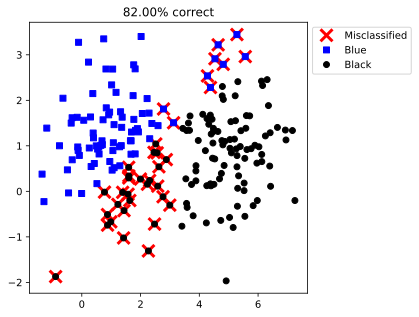

In [28]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'ko')
plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor=(1,1))
plt.title(f'{total_acc:.2f}% correct')
plt.show()